In [721]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine
%matplotlib inline

In [722]:
#pip install plotnine

In [723]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [724]:
# configure plot font family to Arial
#plt.rcParams['font.family'] = 'Arial'
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
#matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Read in and process the data

In [796]:
df = pd.read_csv ( 'Data\FIG0407-09.csv')

df['fill'] = GRAY9
df.loc[ df['concerns-per-1000'] >= 10 ,'fill'] =  RED2

boolIndex = ( df.category == "Tires make excessive noise while driving" ) | \
            ( df.category == "Engine makes abnormal/excessive noise" )    | \
            ( df.category ==  "Excessive wind noise")

df.loc[ boolIndex ,'fill'] =  RED1

df = df.sort_values (['concerns-per-1000'], ascending=False)


# Well that was easy (ish)

In [797]:
# Get a sorted column for the chart. This is indeed a pain.
cat_list = df.sort_values (['concerns-per-1000'], ascending=True)['category'].tolist()
df['category_cat'] = pd.Categorical(df['category'], categories=cat_list)

In [806]:
def SWD_style ():

    # Basic information from the 
    
    font = "Arial"
    t=theme_minimal(base_size = 10, base_family = font ) 

    t2 = theme(
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),

      axis_line = element_line(size = .1, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),

      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
        
      axis_title = element_text(color = GRAY3),

      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),

      plot_title = element_text(color = GRAY4, size= 12 ),
        
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
        
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",

      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),  
        
      strip_text = element_text(color = GRAY7)) 
    
    return t+ t2


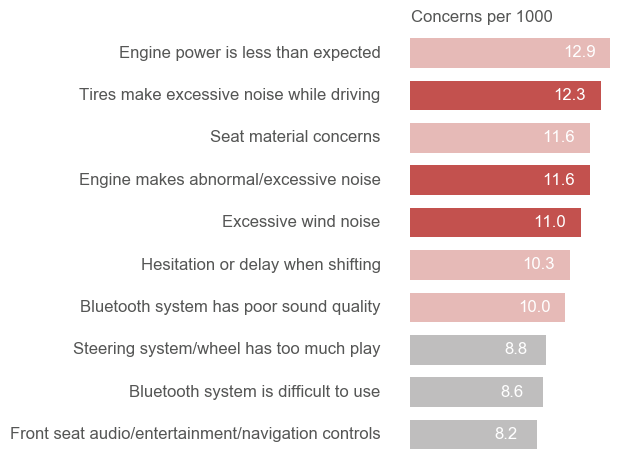

In [807]:
t = theme(         
    
          # Overrides
          axis_line     = element_blank(),

          #axis_title_x  = element_blank(),
          axis_text_x  = element_blank(),

          axis_title_y  = element_blank(),  # nb this will be x 
          #axis_text_y   = element_blank(),
    
          # Chuck out grid lines
          panel_grid_major_y=element_blank(), 
          #panel_background=element_blank(),
          #panel_border = element_rect(colour = "black",  fill=None, size=4)    
)

fig = (ggplot(df, aes (x = 'category_cat', y = 'concerns-per-1000'))   + \
      geom_col(aes(fill = 'fill'), width = .7)  +\
      scale_fill_identity() +\
      geom_text(aes(label = 'concerns-per-1000'), nudge_y = -2, nudge_x = -0, color = 'white', size = 12)+ \
      scale_y_continuous(name = "concerns per 1,000") +\
      coord_flip() + \
      SWD_style() +\
      t 
).draw(show=False, return_ggplot=False) 
      #labs(title = "Top 10 design= concerns")

ax = fig.gca()

# Pop in a title.
#ax0 = fig.add_axes( (0,0,1,1))
#ax0.axis('Off') # don't draw anything.
#ax0.text ( 0, 1 ,'A title', fontsize=10.5,color=GRAY3)

#ax.tick_params (axis='x', width=3 ,labelsize=2, colors=GRAY7, labeltop=True, labelbottom=False,  labelcolor=GRAY5)
#ax.yaxis.set_label_position('right') 
#ax.yaxis.set_label_coords ( 0.2  , -0.01)

ax.set_xlabel('Concerns per 1000', horizontalalignment='left', y=1.0, x=0.65, size = 12)    
ax.xaxis.set_label_position('top') 
#ax.xaxis.set_label_coords ( 0.2, 1.1)

plt.tight_layout()


In [800]:
fig.get_size_inches() 

array([6.4, 4.8])

In [ ]:
# Make it wider so everything fits in
# and print it
fig.dpi = 200
width_in = 8
fig.set_size_inches(width_in , width_in/1.62) 
fig.savefig ( 'Plots/1_horiz_bar')
fig